In [1]:
# pip install yfinance

In [2]:
from datetime import date, timedelta

days = 100

today = date.today()
start_date = today - timedelta(days=days)
end_date = today
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2025-03-20
End Date: 2025-06-28


In [3]:
import yfinance as yf 
import pandas as pd 

data = yf.download('BTC-USD',start=start_date,end=end_date)
data

C:\Users\user\AppData\Local\Temp\ipykernel_2188\435106689.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-20,84167.195312,87443.265625,83647.195312,86872.953125,29028988961
2025-03-21,84043.242188,84782.273438,83171.070312,84164.539062,19030452299
2025-03-22,83832.484375,84513.875000,83674.781250,84046.257812,9863214091
2025-03-23,86054.375000,86094.781250,83794.914062,83831.898438,12594615537
2025-03-24,87498.914062,88758.726562,85541.195312,86070.929688,34582604933
...,...,...,...,...,...
2025-06-23,105577.773438,106116.859375,99705.750000,100987.476562,65237759656
2025-06-24,106045.632812,106316.828125,104740.242188,105571.515625,48822986421


In [4]:
data['Date'] = data.index
# date.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)
data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close', # Renamed to lowercase 'close' for consistency if desired
    'Adj Close': 'adj_close', # Often present, good to rename if keeping
    'Volume': 'volume',
    'Date': 'date' # The 'Date' column you added
}, inplace=True)

data

Price,close,high,low,open,volume,date
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,84167.195312,87443.265625,83647.195312,86872.953125,29028988961,2025-03-20
1,84043.242188,84782.273438,83171.070312,84164.539062,19030452299,2025-03-21
2,83832.484375,84513.875000,83674.781250,84046.257812,9863214091,2025-03-22
3,86054.375000,86094.781250,83794.914062,83831.898438,12594615537,2025-03-23
4,87498.914062,88758.726562,85541.195312,86070.929688,34582604933,2025-03-24
...,...,...,...,...,...,...
95,105577.773438,106116.859375,99705.750000,100987.476562,65237759656,2025-06-23
96,106045.632812,106316.828125,104740.242188,105571.515625,48822986421,2025-06-24
97,107361.257812,108168.398438,105881.390625,106047.406250,51624120283,2025-06-25


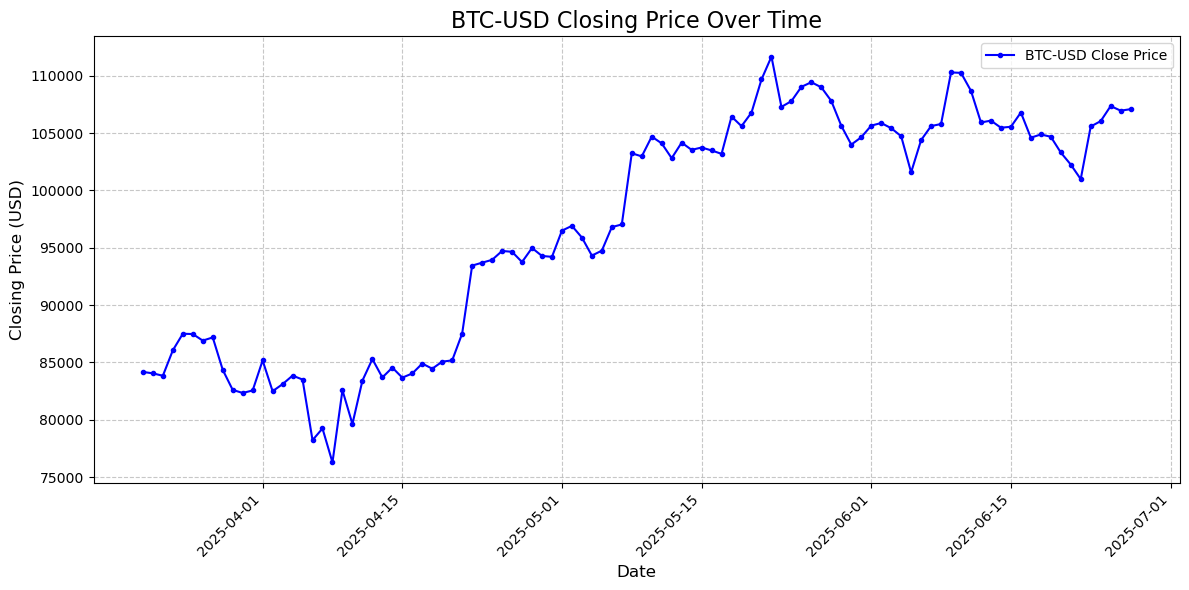

In [6]:
import matplotlib.pyplot as plt
# --- Plotting Improvements ---
dates = data['date']
prices = data['close']

plt.figure(figsize=(12, 6)) # Create a figure and set its size (width, height in inches)

plt.plot(dates, prices, color='blue', linestyle='-', linewidth=1.5, marker='o', markersize=3, label='BTC-USD Close Price')

# Add title and labels
plt.title('BTC-USD Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility if dates overlap
plt.xticks(rotation=45, ha='right') # ha='right' aligns the end of the label with the tick


# Add a legend if you have multiple lines (good practice even for one)
plt.legend()

# Add tight layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
import numpy as np

def create_dataset(series , window_size: int = 20) -> tuple[np.ndarray, np.ndarray]:
    """
    Creates a dataset for time series forecasting by generating sequences (X)
    and their corresponding next values (y).

    Args:
        series (pd.Series or np.ndarray): The input time series data (e.g., stock prices).
                                          Expected to be a 1D array-like structure.
        window_size (int, optional): The number of previous time steps to use as
                                     input features (the length of each sequence).
                                     Defaults to 20.

    Returns:
        tuple[np.ndarray, np.ndarray]: A tuple containing:
            - x_data (np.ndarray): An array of sequences (windows), where each
                                   row is a sequence of `window_size` values.
                                   Shape: (num_samples, window_size)
            - y_data (np.ndarray): An array of target values, where each value
                                   is the data point immediately following its
                                   corresponding sequence in `x_data`.
                                   Shape: (num_samples,)
    """
    x_data = []
    y_data = []

    # The loop should go up to len(series) - window_size
    # because the last sequence starts at index (len(series) - window_size - 1)
    # and the target will be at (len(series) - 1).
    # If the last sequence is series[i:i+window_size], the target is series[i+window_size].
    # So 'i+window_size' must be less than len(series).
    # The max value for 'i' will be len(series) - window_size - 1
    for i in range(len(series) - window_size): # Corrected range end
        a = series[i : i + window_size]
        b = series[i + window_size]
        x_data.append(a)
        y_data.append(b)

    return np.array(x_data), np.array(y_data)

# --- Example Usage ---
if __name__ == "__main__":
    # Example 1: Using a simple numpy array
    test_series_np = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    window = 3
    X_np, y_np = create_dataset(test_series_np, window)
    print("--- Example with numpy array ---")
    print(f"Original Series: {test_series_np}")
    print(f"Window Size: {window}")
    print("X_np (sequences):")
    print(X_np)
    print("y_np (targets):")
    print(y_np)
    print(f"Shapes: X_np {X_np.shape}, y_np {y_np.shape}")
    print("-" * 30)
 

--- Example with numpy array ---
Original Series: [ 1  2  3  4  5  6  7  8  9 10]
Window Size: 3
X_np (sequences):
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
y_np (targets):
[ 4  5  6  7  8  9 10]
Shapes: X_np (7, 3), y_np (7,)
------------------------------


In [ ]:
# pip install scikit-learn

In [8]:
from sklearn.preprocessing import MinMaxScaler 

window_size = 20 
sc = MinMaxScaler(feature_range=(0,1))
X = data['close']
X = sc.fit_transform(X)

x,y = create_dataset(X)


In [9]:
x.shape , y.shape

((80, 20, 1), (80, 1))

In [10]:
from sklearn.model_selection import train_test_split 

x_train,x_test , y_train,y_test = train_test_split(x,y,random_state=0)

In [11]:
x_train.shape

(60, 20, 1)

In [12]:
# pip install keras

In [13]:
from keras.models import Sequential 
from keras.layers import Input,Dense,LSTM
from keras.losses import MeanSquaredError


# --- Model Definition ---
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['mse'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print("\nTraining the model...")
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test),  verbose=1)

print("\nModel training complete.")



Training the model...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

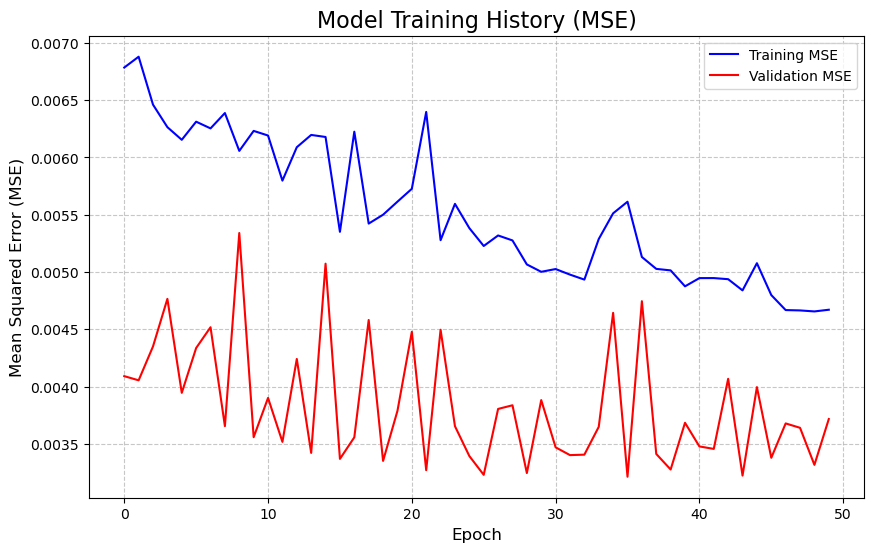

In [33]:

# --- Plotting the training history ---
plt.figure(figsize=(10, 6))

# Plot training MSE
plt.plot(history.history['mse'], 'b', label='Training MSE')

# Plot validation MSE (now available because validation_data was provided)
plt.plot(history.history['val_mse'], 'r', label='Validation MSE')

plt.title('Model Training History (MSE)', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [34]:
pred_steps = 10

predicted_prices=[]

X_pred=[X[-1]]

X_pred = np.array(X_pred)

for _ in range(pred_steps):
    
    prediction = model.predict([X_pred])
    
    price=prediction[0]
    
    predicted_prices.append(price)
    
    X_pred = np.append(X_pred, [price], axis=1)
    
    X_pred = X_pred[:, 1:]
    # print(f'x_pred {X_pred}')

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = sc.inverse_transform(predicted_prices)
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[81102.0199151 ]
 [79650.49974553]
 [79532.1865675 ]
 [79520.55921565]
 [79519.41660539]
 [79519.3045072 ]
 [79519.29342926]
 [79519.29237422]
 [79519.29211046]
 [79519.29211046]]


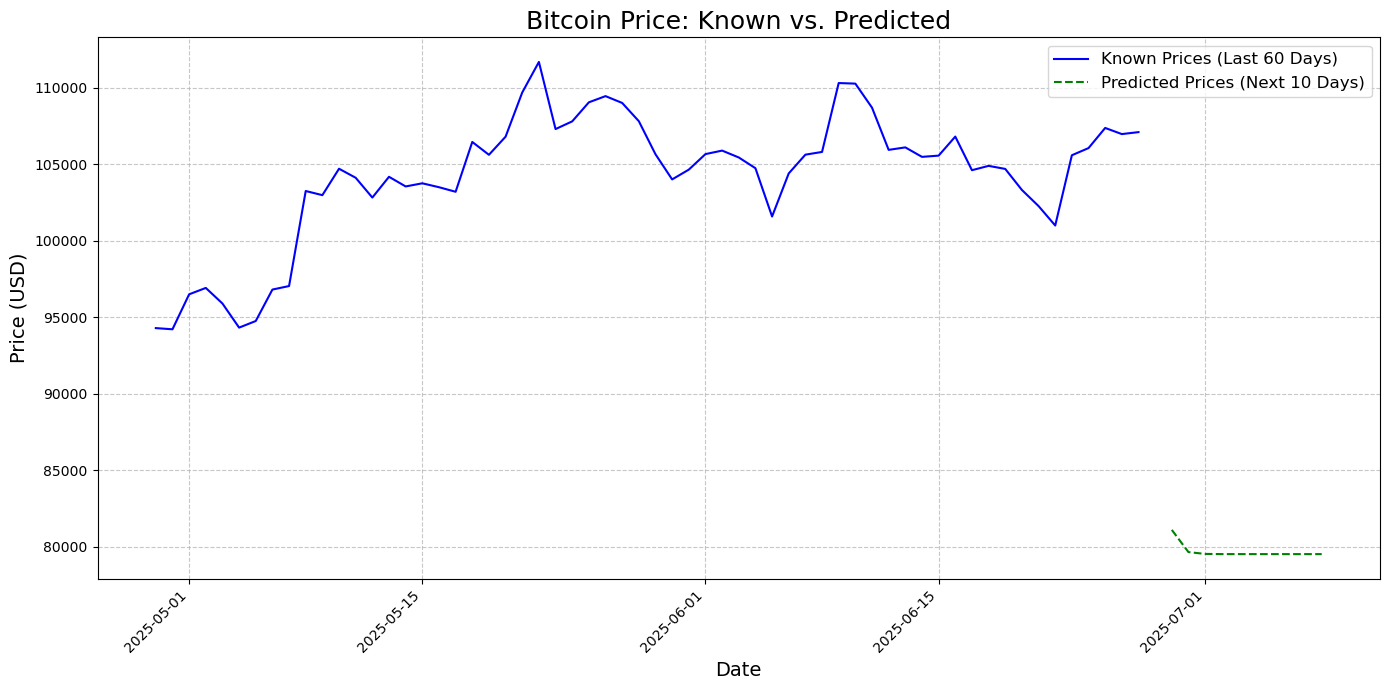

In [35]:
prevous_days = 60 # Number of past days to show on the plot
pred_steps = 10   # Number of future steps to predict
# --- Prepare data for plotting ---
# Known data: last 'prevous_days' from the original (unscaled) DataFrame
data_know_dates = data['date'].iloc[-prevous_days:].values # Slicing for multiple rows
known_prices = data['close'].iloc[-prevous_days:].values # Slicing for multiple rows

# Predicted dates
# Ensure 'today' is a datetime.date object from datetime.date.today() or similar
current_date_dt = pd.to_datetime(today) # Convert date.date to datetime for pd.date_range
dates_pred = pd.date_range(start=current_date_dt + timedelta(days=1), periods=pred_steps).values

# --- Plotting ---
plt.figure(figsize=(14, 7))

# Plot known data
plt.plot(data_know_dates, known_prices, 'b-', label=f'Known Prices (Last {prevous_days} Days)') # Changed to blue line

# Plot predicted data
plt.plot(dates_pred, predicted_prices, 'g--', label=f'Predicted Prices (Next {pred_steps} Days)') # Dashed green line

plt.title('Bitcoin Price: Known vs. Predicted', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
